In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats


# Historical data for NASDAQ and NSE indices.   



In [2]:
data_dji = pd.read_csv("DJI.csv").iloc[-248:]
data_nifty = pd.read_csv("Nifty.csv").iloc[-248:]
data_nasdaq = pd.read_csv("NASDAQ.csv").iloc[-248:]
data_nifty_bank = pd.read_csv("Nifty_Bank.csv").iloc[-248:]

# CO-RELATION COEFFICIENTS

In [3]:
co_rel_dji_nifty = np.corrcoef(data_dji['Close'], data_nifty['Close'])[0, 1]
co_rel_dji_nifty_bank = np.corrcoef(data_dji['Close'], data_nifty_bank['Close'])[0, 1]
co_rel_nasdaq_nifty = np.corrcoef(data_nasdaq['Close'], data_nifty['Close'])[0, 1]
co_rel_nasdaq_nifty_bank = np.corrcoef(data_nasdaq['Close'], data_nifty_bank['Close'])[0, 1]

print("Co-relation coefficients:-\n")
print("Nifty & DJI = ", f"{co_rel_dji_nifty:.3f}")
print("Bank Nifty & DJI = ", f"{co_rel_dji_nifty_bank:.3f}")
print("Bank Nifty & NASDAQ = ", f"{co_rel_nasdaq_nifty_bank:.3f}")
print("Nifty & NASDAQ = ", f"{co_rel_nasdaq_nifty:.3f}")

Co-relation coefficients:-

Nifty & DJI =  0.588
Bank Nifty & DJI =  0.578
Bank Nifty & NASDAQ =  0.005
Nifty & NASDAQ =  0.032


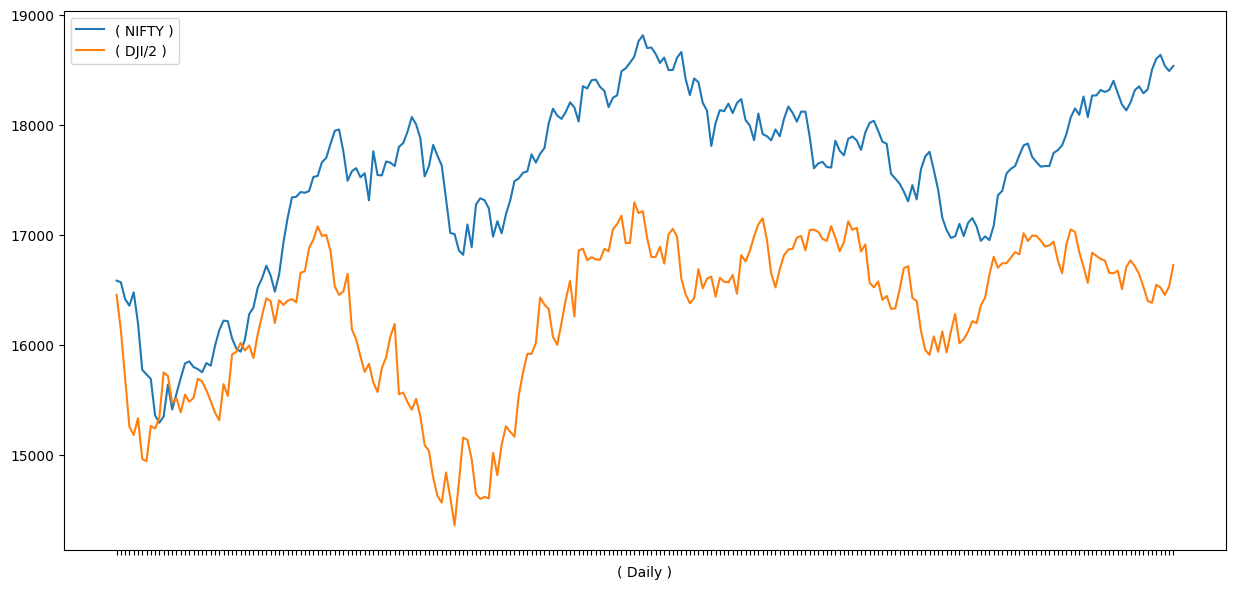

In [4]:
dates = data_nifty['Date']

plt.figure(figsize=(15,7))
plt.plot(dates, data_nifty["Close"], label="( NIFTY )")
plt.plot(dates, 0.50*data_dji["Close"], label="( DJI/2 )")
plt.xlabel('( Daily )')
plt.legend(loc='best')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

# LEAD LAG RELATION

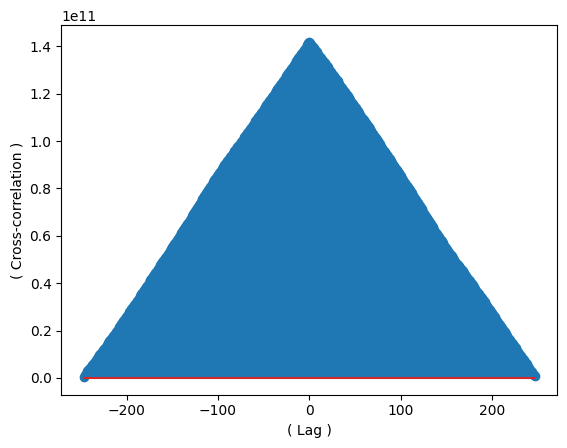

lag period: 0.0


In [5]:
cross_cor = np.correlate(data_nifty['Close'], data_dji['Close'], mode='full')
max_cor_lag = np.argmax(cross_cor) - (len(data_nifty) - 1)
average_period = max_cor_lag / len(data_nifty)

lags = np.arange(-len(data_nifty) + 1, len(data_nifty))
plt.stem(lags, cross_cor)
plt.xlabel('( Lag )')
plt.ylabel('( Cross-correlation )')
plt.show()

print(f"lag period: {average_period}")

#  KELTNER CHANNELS

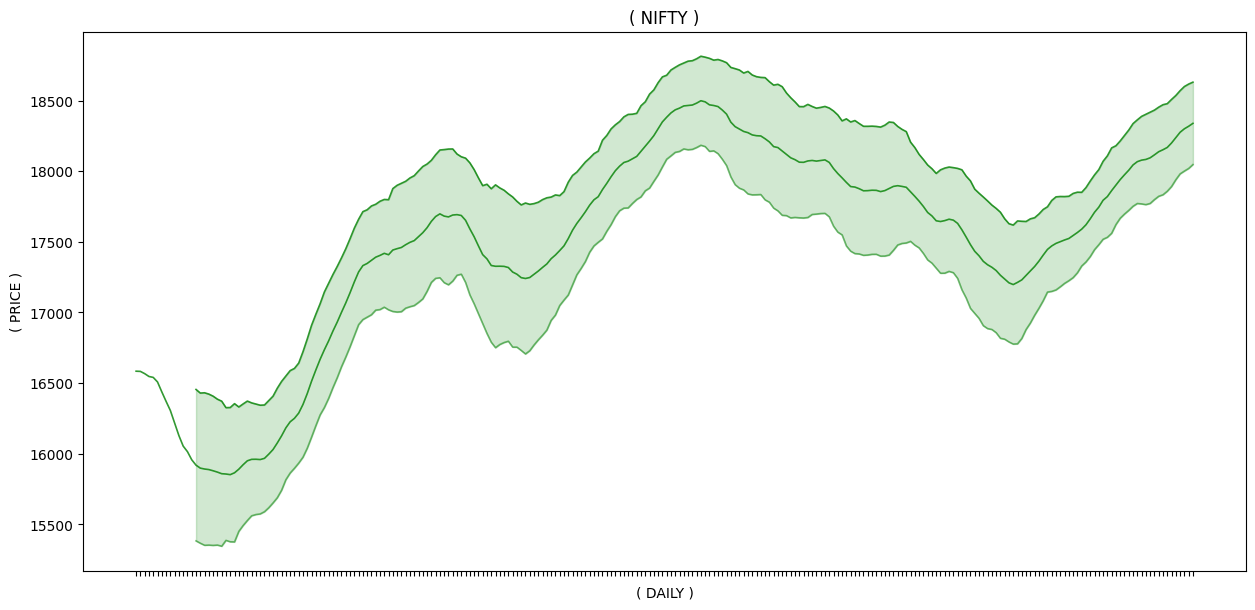

In [6]:
def calculate_ema(dataframe):
    ema = dataframe['Close'].ewm(span=20, adjust=False).mean()
    return ema

def calculate_atr(data):
    # True Range 
    data['HL'] = data['High'] - data['Low']
    data['HC'] = abs(data['High'] - data['Close'].shift(1))
    data['LC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR'] = data[['HL', 'HC', 'LC']].max(axis=1)

    # Average True Range 
    data['ATR'] = data['TR'].rolling(15).mean()

    return data['ATR']

data = data_nifty

date = data['Date']
ema = calculate_ema(data)
atr = calculate_atr(data)

plt.figure(figsize=(15,7))
plt.plot(date, ema, color='green', linewidth=1.2, alpha=0.8)
plt.plot(date, ema-(2*atr), color='green', linewidth=1.2, alpha=0.5)
plt.plot(date, ema+(2*atr), color='green', linewidth=1.2, alpha=0.8)
plt.fill_between(date, ema-(2*atr), ema+(2*atr), color='green', alpha=0.18)

plt.title('( NIFTY )')
plt.ylabel('( PRICE )')
plt.xlabel('( DAILY )')
plt.plot([], [], ' ')

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

# BOLLINGER BANDS

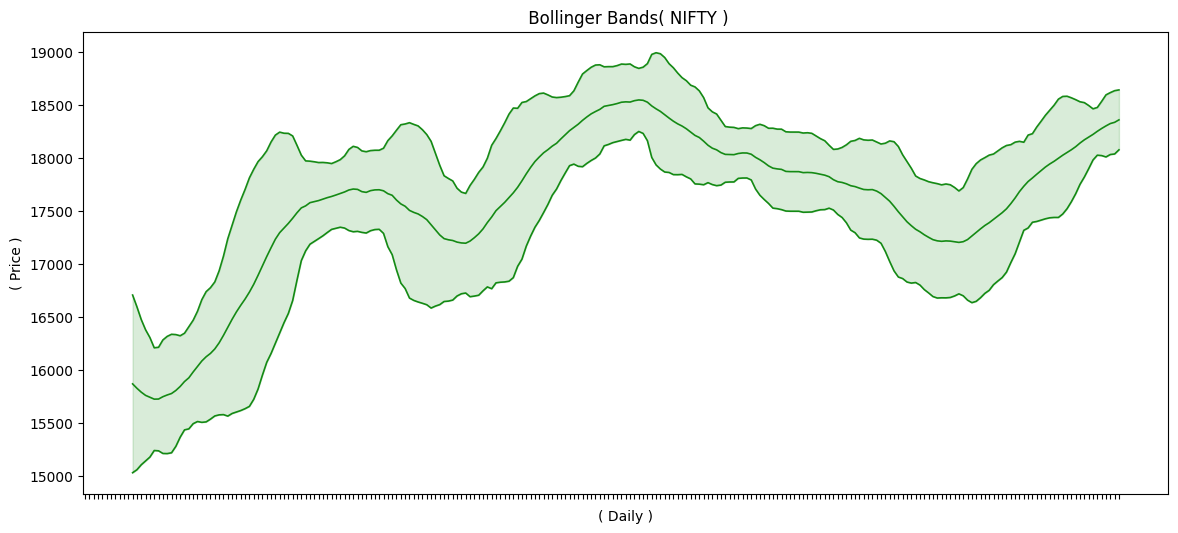

In [7]:
def calculate_bollinger_bands(data):
    rolling_mean = data['Close'].rolling(window=20).mean()
    rolling_std = data['Close'].rolling(window=20).std()

    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)

    return rolling_mean, upper_band, lower_band

data = data_nifty
rolling_mean, upper_band, lower_band = calculate_bollinger_bands(data)

plt.figure(figsize=(14,6))
plt.plot(date, rolling_mean, color='green', linewidth=1.2, alpha=0.9)
plt.plot(date, upper_band, color='green', linewidth=1.2, alpha=0.9)
plt.plot(date, lower_band, color='green', linewidth=1.2, alpha=0.9)
plt.fill_between(date, lower_band, upper_band, color='green', alpha=0.15)
plt.title(' Bollinger Bands( NIFTY )')
plt.ylabel('( Price )')
plt.xlabel('( Daily )')
plt.plot([], [], ' ', label='2x Std Dev ')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show()

#  MACD

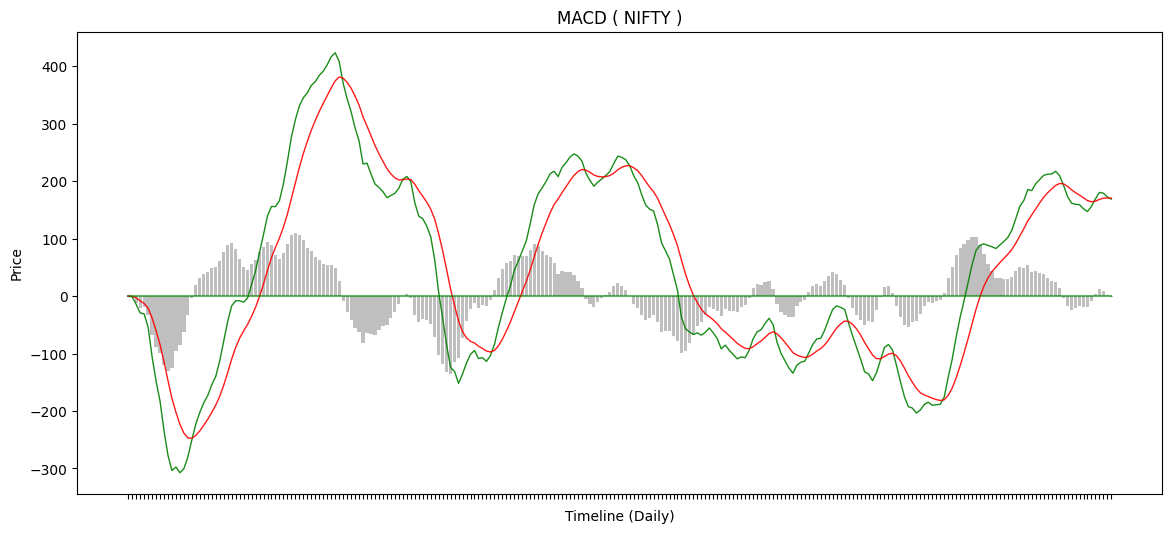

In [8]:
def calculate_macd(data, short_period, long_period, signal_period):
    short_ema = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_period, adjust=False).mean()
    
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
    macd_histogram = macd_line - signal_line
    
    return macd_line, signal_line, macd_histogram

data = data_nifty

macd_line, signal_line, macd_histogram = calculate_macd(data, 12, 26, 9)

plt.figure(figsize=(14,6))
plt.plot(date, macd_line, label='MACD', color='green', alpha=0.9, linewidth=1.0)
plt.plot(date, signal_line, label='Signal', color='red', alpha=0.9, linewidth=1.0)
zeros = np.zeros(len(data))
plt.plot(date, zeros, color='green', alpha=0.6)
plt.bar(date, macd_histogram, color='black', alpha=0.25)

plt.title('MACD ( NIFTY )')
plt.ylabel('Price')
plt.xlabel('Timeline (Daily)')
plt.plot([], [], ' ', label='12, 26, 9')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

# Buy-sell Signals for Reliance


if ( Signal line cross MACD from above ) & ( MA26 > MA12 ) => BUY Signal

if ( Signal line cross MACD from below ) & ( MA26 < MA12 ) => SELL Signal



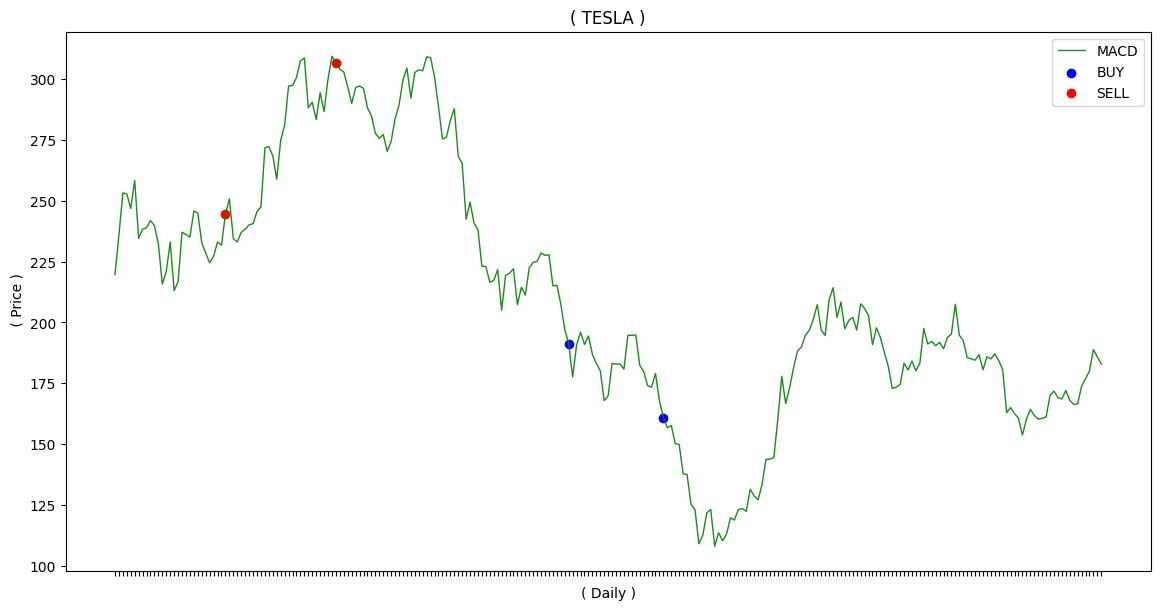

In [12]:
data = pd.read_csv('TSLA.csv')
date = data['Date']
ema = calculate_ema(data)
atr = calculate_atr(data)
rolling_mean, upper_band, lower_band = calculate_bollinger_bands(data)
macd_line, signal_line, macd_histogram = calculate_macd(data, 12, 26, 9)

def detect_crossover(data, a, b):
    ma_l = data['Close'].rolling(window=26).mean()
    ma_s = data['Close'].rolling(window=12).mean()

    p_cross = []
    n_cross = []
    p_cross.append(None)
    n_cross.append(None)

    for i in range(1, len(a)):
        if (a[i-1] < b[i-1]) and (a[i] >= b[i]):
            if(ma_l[i] > ma_s[i]):
                p_cross.append(data['Close'][i])
            else:
                p_cross.append(None)
            n_cross.append(None)
        elif (a[i-1] > b[i-1]) and (a[i] <= b[i]):
            p_cross.append(None)
            if(ma_l[i] < ma_s[i]):
                n_cross.append(data['Close'][i])
            else:
                n_cross.append(None)
        else :
            p_cross.append(None)
            n_cross.append(None)

    return p_cross, n_cross

macd_pc, macd_nc = detect_crossover(data, signal_line, macd_line)


plt.figure(figsize=(14,7))
plt.plot(date, data['Close'], label='MACD', color='green', alpha=0.9, linewidth=1.0)
plt.title('( TESLA )')
plt.ylabel(' ( Price )')
plt.xlabel('( Daily )')
plt.scatter(date, macd_pc, color='blue', label='BUY')
plt.scatter(date, macd_nc, color='red', label='SELL')
plt.legend(loc='best')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

# NET PROFIT/LOSS

In [10]:
buy_sell = {'Buying Date':[], 'Buying Price':[], 'Selling Date':[], 'Selling Price':[]}
for i in range(0, len(date)):
    if(macd_pc[i] != None):
        buy_sell['Buying Date'].append(date[i])
        buy_sell['Buying Price'].append(macd_pc[i])    
    if(macd_nc[i] != None):
        buy_sell['Selling Date'].append(date[i])
        buy_sell['Selling Price'].append(macd_nc[i])    

buy_sell = pd.DataFrame(buy_sell)
sell = buy_sell['Selling Price']
buy = buy_sell['Buying Price']
netpl = sell-buy
buy_sell['Net profit/loss'] = netpl
print(buy_sell)
cumm_return = sum(netpl)
print('\n\t\t\tCUMULATIVE RETURNS = ', '{0:.2f}'.format(cumm_return))
print('\n\t\t\tSHARPE RATIO = ', '{0:.2f}'.format(stats.mean(netpl)/stats.stdev(netpl)))

  Buying Date  Buying Price Selling Date  Selling Price  Net profit/loss
0  2022-11-08    191.300003   2022-07-07     244.543335        53.243332
1  2022-12-13    160.949997   2022-08-16     306.563324       145.613327

			CUMULATIVE RETURNS =  198.86

			SHARPE RATIO =  1.52
